<h1 align="center">Car Price Prediction using Machine Learning Algorithms</h1>

### 1. Import all required libraries

In [1]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing and machine learning libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

KeyboardInterrupt: 

### 2. Load Dataset

In [2]:
car_dataset = pd.read_csv("CarPrice.csv")

### 3. Data Exploration

In [3]:
# Show the first five rows of the dataset
car_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Get the size (number of rows and columns) of the dataset
print(car_dataset.shape)

(205, 26)


In [5]:
# Statistical information
car_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [6]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### 4. Exploratory Data Analysis

#### 4.1. Price Distribution

In [7]:
# Set up the Seaborn style
sns.set(style="darkgrid")

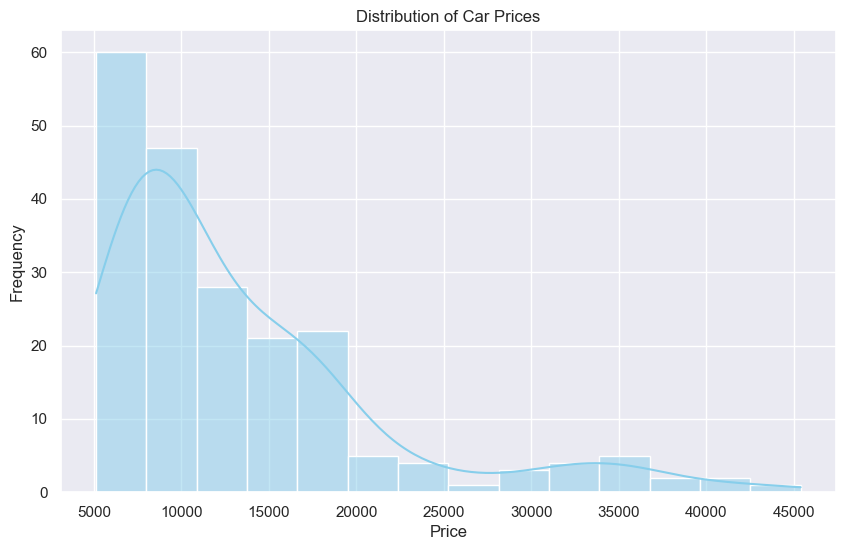

In [8]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the distribution of prices using Seaborn's distplot
sns.histplot(car_dataset['price'], kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

#### 4.2. Relationship between car length, width, height, engine size, horse power, bore ratio and price

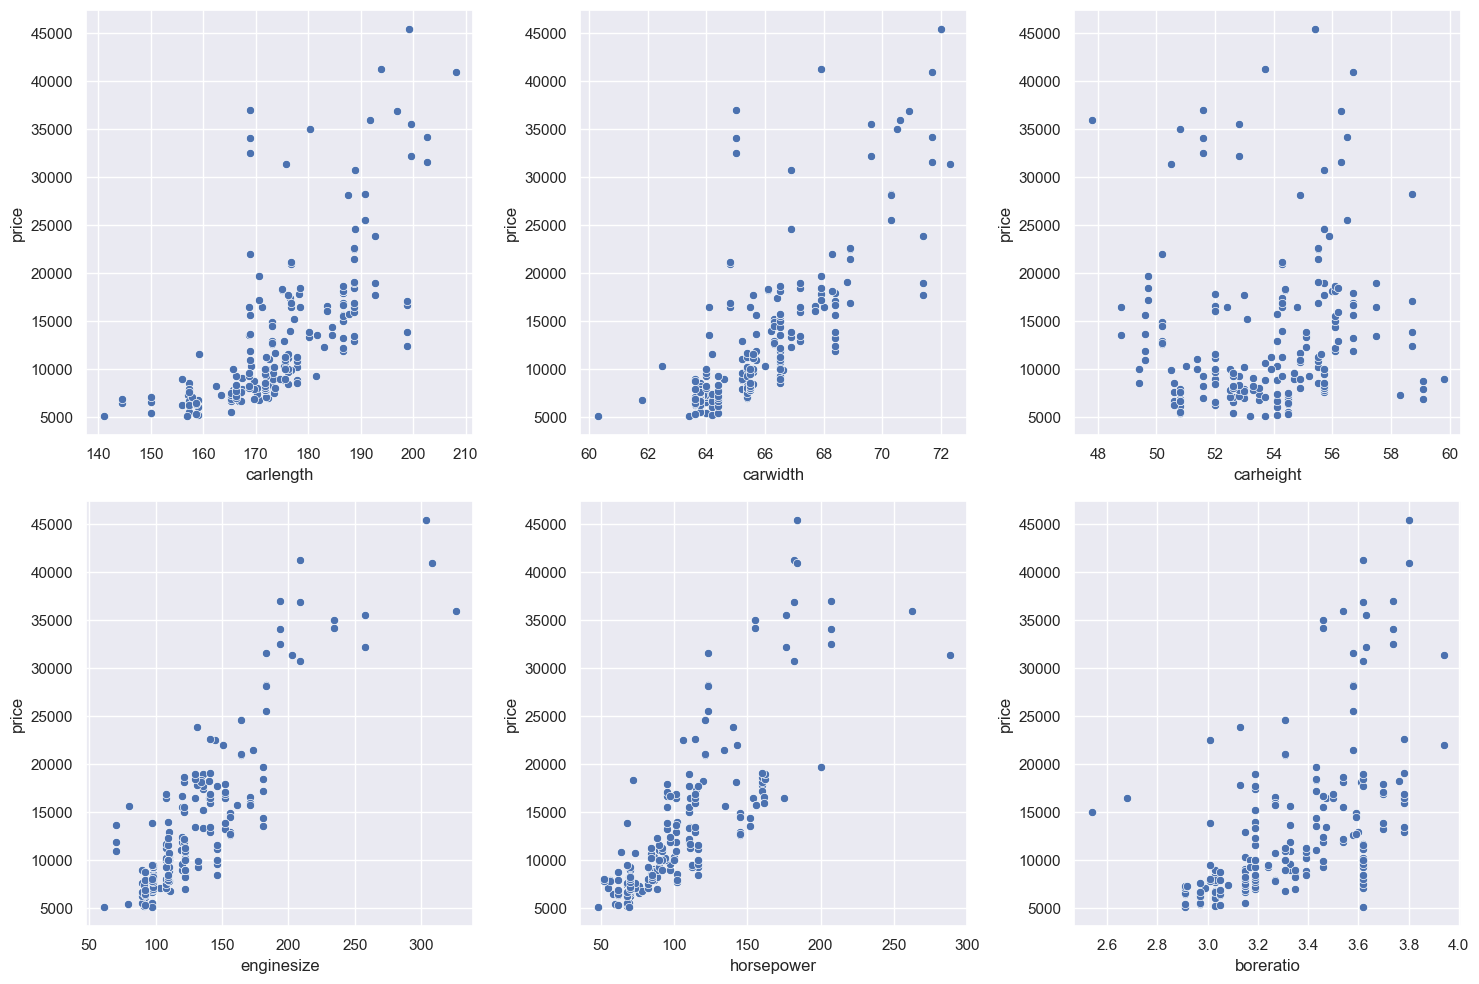

In [9]:
# Define the features and their corresponding positions in the subplot grid
features = ['carlength', 'carwidth', 'carheight', 'enginesize', 'horsepower', 'boreratio']
positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

# Create a 2x3 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot each feature in the corresponding subplot
for i, (feat, pos) in enumerate(zip(features, positions)):
    sns.scatterplot(data=car_dataset, x=feat, y='price', ax=axs[pos[0], pos[1]])
    
# Remove empty subplots (if any)
if len(features) < 6:
    for i in range(len(features), 2):
        for j in range(3):
            fig.delaxes(axs[i, j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### 4.3. Does the type of engine tell us anything about the price?

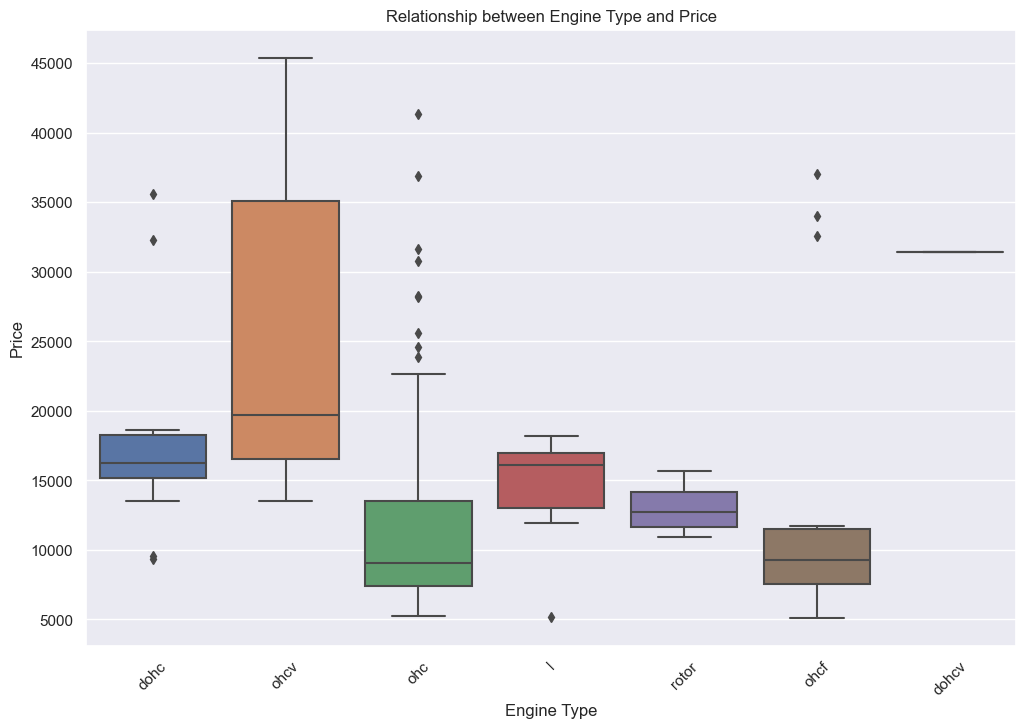

In [10]:
# Create a box plot to visualize the relationship between engine type and price
plt.figure(figsize=(12, 8))
sns.boxplot(x='enginetype', y='price', data=car_dataset)
plt.title('Relationship between Engine Type and Price')
plt.xlabel('Engine Type')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### 5. Data Preparation

#### 5.1. Identify features and target

In [11]:
features = car_dataset.drop(columns=['price'])

target = car_dataset['price']

#### 5.2. Scaling Numeric Columns and One Hot Encode Categorical Columns

In [12]:
# Identify numeric and categorical columns
numeric_columns = features.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = features.select_dtypes(exclude=[np.number]).columns.tolist()

In [13]:
# Define preprocessing steps for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale numeric columns
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical columns
])

In [14]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['car_ID', 'symboling', 'wheelbase',
                                  'carlength', 'carwidth', 'carheight',
                                  'curbweight', 'enginesize', 'boreratio',
                                  'stroke', 'compressionratio', 'horsepower',
                                  'peakrpm', 'citympg', 'highwaympg']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['CarName', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem'])])

In [15]:
# Fit and transform the data using the preprocessor
processed_features = preprocessor.fit_transform(features)

#### 5.3. Split Dataset into training and test set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, target, test_size=0.2)

### 6. Model Building

In [17]:
# Train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Train Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Function to evaluate model and return metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return y_test, y_pred, rmse, mae, r2

In [19]:
# Evaluate Linear Regression model
linear_y_test, linear_y_pred, linear_rmse, linear_mae, linear_r2 = evaluate_model(linear_reg, X_test, y_test)

# Evaluate Random Forest model
forest_y_test, forest_y_pred, forest_rmse, forest_mae, forest_r2 = evaluate_model(random_forest, X_test, y_test)

# Print model evaluation metrics
print("Linear Regression Metrics:")
print(f"  RMSE: {linear_rmse:.2f}")
print(f"  MAE: {linear_mae:.2f}")
print(f"  R^2 Score: {linear_r2:.4f}")
print("\nRandom Forest Metrics:")
print(f"  RMSE: {forest_rmse:.2f}")
print(f"  MAE: {forest_mae:.2f}")
print(f"  R^2 Score: {forest_r2:.4f}")

Linear Regression Metrics:
  RMSE: 13627.60
  MAE: 9214.92
  R^2 Score: -0.9237

Random Forest Metrics:
  RMSE: 2503.58
  MAE: 1714.02
  R^2 Score: 0.9351


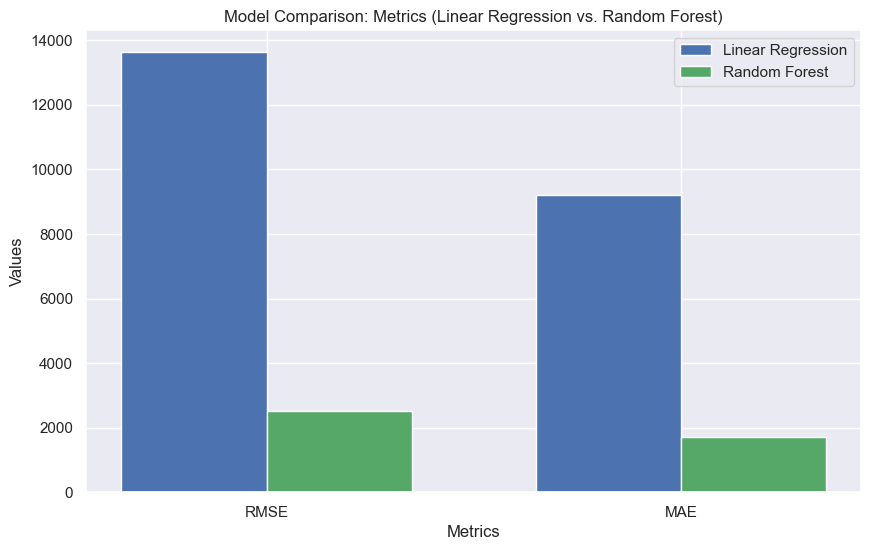

In [20]:
# Collect metrics into lists
metrics = ['RMSE', 'MAE']
linear_metrics_values = [linear_rmse, linear_mae]
forest_metrics_values = [forest_rmse, forest_mae]

# Plotting the bar plot
bar_width = 0.35
index = np.arange(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(index, linear_metrics_values, bar_width, label='Linear Regression', color='b')
plt.bar(index + bar_width, forest_metrics_values, bar_width, label='Random Forest', color='g')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Comparison: Metrics (Linear Regression vs. Random Forest)')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()
plt.show()

In [21]:
# Create DataFrame to combine results
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted_LR': linear_y_pred,
    'Predicted_RF': forest_y_pred
})

In [22]:
results_df.head(10).reset_index(drop=True)

,Actual,Predicted_LR,Predicted_RF
0,10595.0,947.789492,9459.120
1,13860.0,15550.273491,17111.535
2,21105.0,28795.704249,18897.470
3,34028.0,20878.578506,31411.215
4,16515.0,34418.000260,15081.800
5,8195.0,31467.060416,8347.140
6,5118.0,7017.938453,7048.530
7,37028.0,24938.612760,30982.285
8,23875.0,10477.833396,18488.865
9,8495.0,686.279086,10726.710
